### Clase 5

### Hypothesis testing

A confidence interval provides a range of plausible values for the population parameter, whereas a test of significance assesses the likelihood of a specific claim or hypothesis about the population parameter.

In [1]:
import numpy as np
from scipy import stats

### p-value using scipy.stats

In [2]:
help(stats.ttest_1samp)

Help on function ttest_1samp in module scipy.stats._stats_py:

ttest_1samp(a, popmean, axis=0, nan_policy='propagate', alternative='two-sided')
    Calculate the T-test for the mean of ONE group of scores.
    
    This is a test for the null hypothesis that the expected value
    (mean) of a sample of independent observations `a` is equal to the given
    population mean, `popmean`.
    
    Parameters
    ----------
    a : array_like
        Sample observation.
    popmean : float or array_like
        Expected value in null hypothesis. If array_like, then it must have the
        same shape as `a` excluding the axis dimension.
    axis : int or None, optional
        Axis along which to compute test; default is 0. If None, compute over
        the whole array `a`.
    nan_policy : {'propagate', 'raise', 'omit'}, optional
        Defines how to handle when input contains nan.
        The following options are available (default is 'propagate'):
    
          * 'propagate': returns 

In [3]:
# thickness of windshields
sample = np.array([4.2, 4.1, 4.3, 4.0, 4.2, 4.4, 4.1, 4.5, 4.2, 4.3])

# null hypothesis value
null_value = 4

# one-sample t-test
_, p_value = stats.ttest_1samp(
    sample, null_value, alternative='greater'
)

# significance level (α)
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

# Print the computed p-value
print("p-value:", p_value)

Reject the null hypothesis
p-value: 0.0004436668996126396


In [4]:
# test scores
sample = np.array(
    [830, 845, 870, 825, 860, 840, 855, 875, 835, 865]
)

# Define the null hypothesis value
null_value = 850

# Perform two-sample t-test
_, p_value = stats.ttest_1samp(
    sample, null_value
)

# Define the significance level (α)
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

# Print the computed p-value
print("p-value:", p_value)

Fail to reject the null hypothesis
p-value: 1.0


### How to compute the p-value?

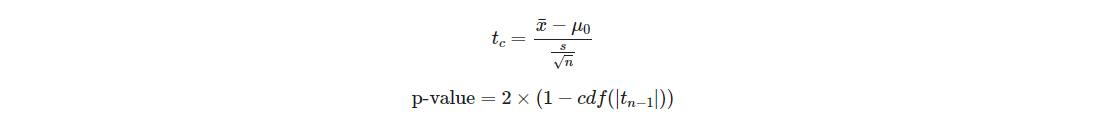

In [5]:
sample = [1.5, 2.0, 2.5]
mu_0 = 2.0
# Compute the sample mean and standard deviation
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)

# Compute the t-statistic
t_stat = (sample_mean - mu_0) / (sample_std / np.sqrt(len(sample)))

# Compute the degrees of freedom
df = len(sample) - 1

### Bilateral

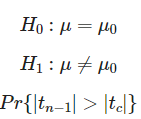

In [6]:
# Null hypothesis
# mu_0 = 2.0
# One-sample t-test for mu = mu_0
_, p_value_1 = stats.ttest_1samp(sample, mu_0)

print("p-value:", p_value_1)

p-value: 1.0


In [7]:
p_value_1 = 2 * (1 - stats.t.cdf(abs(t_stat), df))
print("p-value:", p_value_1)

p-value: 1.0


### Upper

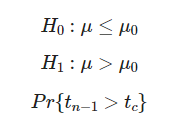

In [8]:
# One-sample t-test for mu <= mu_0
t_stat, p_value_2 = stats.ttest_1samp(
    sample, mu_0, alternative='less'
)

print("p-value:", p_value_2)

p-value: 0.5


In [9]:
# Calculate the p-value for mu <= mu_0
p_value_2 = stats.t.cdf(t_stat, df)

print("p-value:", p_value_2)

p-value: 0.5


#### Lower

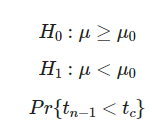

In [11]:
# One-sample t-test for mu >= mu_0
t_stat, p_value_3 = stats.ttest_1samp(
    sample, mu_0, alternative='greater'
)

print("p-value:", p_value_3)

p-value: 0.5


In [12]:
# Calculate the p-value for mu >= mu_0
p_value_3 = 1 - stats.t.cdf(t_stat, df)

print("p-value:", p_value_3)

p-value: 0.5


### z-test for a proportion

he test statistic z measures the number of standard deviations that the sample proportion is away from the hypothesized proportion.

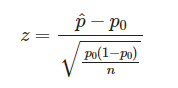

Where:

- z is the test statistic following the standard normal distribution.
- (\hat{p}) is the sample proportion.
- (p_0) is the hypothesized population proportion under the null hypothesis.
- (n) is the sample size.

In [13]:
# Given information
alpha = 0.05
p_hypothesized = 0.35
sample_size = 300
sample_success = 90

# Calculate the sample proportion
p_sample = sample_success / sample_size

# Calculate the standard error
se = np.sqrt((p_hypothesized * (1 - p_hypothesized)) / sample_size)

# Calculate the test statistic
z = (p_sample - p_hypothesized) / se

# Calculate the p-value (two-tailed)
p_value = 2 * (1 - stats.norm.cdf(np.abs(z)))

print(f"p-value: {p_value}")

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

p-value: 0.06941907499936395
Fail to reject the null hypothesis


In [14]:
# Given information
sample_mean = 750
sample_size = 50
population_std = 120
population_mean = 800
significance_level = 0.01

# Calculate the test statistic
standard_error = population_std / np.sqrt(sample_size)
t_value = (sample_mean - population_mean) / standard_error

# Calculate the critical value
degrees_of_freedom = sample_size - 1
critical_value = stats.t.ppf(1 - significance_level, degrees_of_freedom)

print(t_value, critical_value)
# Compare the test statistic with the critical value
if t_value < -critical_value or t_value > critical_value:
    print("Reject the lot")
else:
    print("Do not reject the lot")

-2.946278254943948 2.4048917596601207
Reject the lot


The probability of committing a Type II error is equal to 1 minus the cumulative distribution function (CDF) of the test statistic for the alternative hypothesis.

In [15]:
alternative_mean = 790

# Calculate the test statistic for the alternative hypothesis
t_value_alt = (sample_mean - alternative_mean) / standard_error

# Calculate the p-value for the alternative hypothesis
p_value_alt = stats.t.cdf(t_value_alt, degrees_of_freedom)

# Calculate the probability of Type II error
type_ii_error = 1 - p_value_alt

print(f"Probability of Type II error: {type_ii_error}")

Probability of Type II error: 0.9887688839004888


### Questions asked in class

In [16]:
# search for xi test
# Observed frequency counts
observed = np.array(
    [[50, 30], [20, 100]]
)

# Perform chi-square test
_, p_value, _, _ = stats.chi2_contingency(observed)

print("p-value:", p_value)

p-value: 7.707766001215446e-11
